# Задание
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели: одну из линейных моделей; SVM; дерево решений.
5. Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.
6. Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.
7. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

%matplotlib inline 
sns.set(style="ticks")

In [0]:
url = 'https://raw.githubusercontent.com/Smet1/bmstu_ml/master/lab4/data.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [50]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [51]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбца.'.format(row_number, column_number))

Данный датасет содержит 4600 строк и 18 столбца.


## Обработка пропусков в данных

In [0]:
for col in df.columns:
    null_count = df[df[col].isnull()].shape[0]
    if null_count > 0:
        column_type = df[col].dtype
        percent = round((null_count / row_number) * 100, 3)
        print('{} - {} - {}. Тип - {}'.format(col, null_count, percent, column_type))

In [53]:
for col in df.columns:
    column_type = df[col].dtype
    print('{} - тип: {}'.format(col, column_type))

date - тип: object
price - тип: float64
bedrooms - тип: float64
bathrooms - тип: float64
sqft_living - тип: int64
sqft_lot - тип: int64
floors - тип: float64
waterfront - тип: int64
view - тип: int64
condition - тип: int64
sqft_above - тип: int64
sqft_basement - тип: int64
yr_built - тип: int64
yr_renovated - тип: int64
street - тип: object
city - тип: object
statezip - тип: object
country - тип: object


Удаление или заполнение пропусков, не требуется, так как в датасете отсутствуют пустые значения

## Кодирование категориальных признаков

In [54]:
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

date
street
city
statezip
country


In [55]:
print(len(df['date'].unique()))
print(len(df['street'].unique()))
print(len(df['city'].unique()))
print(len(df['statezip'].unique()))
print(len(df['country'].unique()))

70
4525
44
77
1


In [0]:
# кодируем
leDate = LabelEncoder()
df['date'] = leDate.fit_transform(df['date'])

leStreet = LabelEncoder()
df['street'] = leStreet.fit_transform(df['street'])

leCity = LabelEncoder()
df['city'] = leCity.fit_transform(df['city'])

leStatezip = LabelEncoder()
df['statezip'] = leStatezip.fit_transform(df['statezip'])

leCountry = LabelEncoder()
df['country'] = leCountry.fit_transform(df['country'])

In [0]:
# проверяем остались ли признаки
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

In [58]:
df = df.drop('country', axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62
1,0,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58
2,0,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26
3,0,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7
4,0,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,68,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62
4596,68,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6
4597,68,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37
4598,69,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71


In [0]:
from sklearn.model_selection import train_test_split

df_x = df.loc[:, df.columns != 'price']
df_y = df['price']
# df_x = df.loc[:, df.columns != 'bedrooms']
# df_y = df['bedrooms']
train_x_df, test_x_df, train_y_df, test_y_df = train_test_split(df_x, df_y, test_size=0.3, random_state=1)

In [60]:
row_number_train = train_x_df.shape[0]
column_number_train = train_x_df.shape[1]

print('Тренировочный датасет содержит {} строки и {} столбцов.'.format(row_number_train, column_number_train))

Тренировочный датасет содержит 3220 строки и 16 столбцов.


In [61]:
row_number_test = test_x_df.shape[0]
column_number_test = test_x_df.shape[1]

print('Тестовый датасет содержит {} строки и {} столбцов.'.format(row_number_test, column_number_test))

Тестовый датасет содержит 1380 строки и 16 столбцов.


## 3. Обучение моделей

### 3.1 Линейная модель

#### Матрица корреляции

In [62]:
corr_matrix = df.corr()
corr_matrix

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
date,1.000000,0.033906,0.005762,0.019263,0.029481,-0.020393,0.029607,0.017586,0.005844,0.007853,0.041038,-0.015050,0.001356,-0.018437,-0.005089,-0.020325,-0.004546
price,0.033906,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,0.029366,0.018625,-0.043385
bedrooms,0.005762,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,-0.035507,-0.130447,-0.152773
bathrooms,0.019263,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,0.007175,-0.097026,-0.194497
sqft_living,0.029481,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,0.006411,-0.109686,-0.198918
sqft_lot,-0.020393,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,-0.023028,-0.079135,-0.128466
floors,0.029607,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996,0.056191,0.078481,-0.038943
waterfront,0.017586,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,0.035448,0.001450,0.007938
view,0.005844,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,0.065077,0.001340,0.079340
condition,0.007853,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,-0.005480,-0.010592,0.027666


In [63]:
corr_matrix['price'].nlargest(4)

price          1.00000
sqft_living    0.43041
sqft_above     0.36757
bathrooms      0.32711
Name: price, dtype: float64

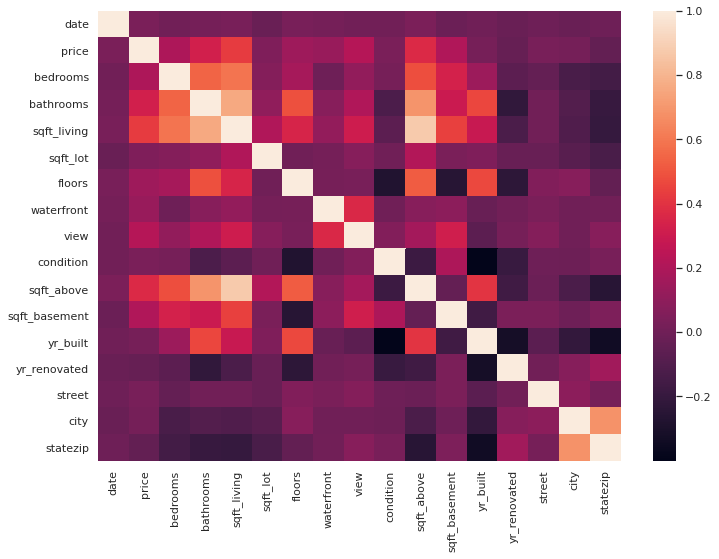

In [64]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(corr_matrix)

In [65]:
import plotly.express as px
fig = px.scatter(df, x='price', y='sqft_living')
fig.show()

In [66]:
fig = px.scatter(df, x='price', y='sqft_above')
fig.show()

In [67]:
fig = px.scatter(df, x='price', y='bathrooms')
fig.show()

#### Вычисление коэффициентов регрессии матричным способом

In [68]:
import numpy as np

X_0 = np.ones(row_number_train).T
X = np.column_stack((X_0, train_x_df))
B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), train_y_df)
B

array([ 2.16042749e+07, -1.88639167e+06,  1.50488211e+07,  6.87182564e+06,
       -7.73907451e+03,  2.97524360e+01,  3.87520025e+06,  1.32699456e+07,
       -3.31133583e+06,  1.60368442e+05, -3.78800828e+03, -1.07808450e+03,
       -2.15085247e+03,  8.29539254e+00, -1.39430250e+00,  3.33658898e+03,
       -1.34477856e+03])

#### 3.1.3 Использование класса LinearRegression библиотеки scikit-learn

Обучение c произвольным гиперпараметром

In [69]:
from sklearn.linear_model import Lasso

reg1 = Lasso(alpha=0.1, tol=0.4).fit(np.array(train_x_df), np.array(train_y_df).reshape(-1, 1))
B_1 = (reg1.intercept_, reg1.coef_)

B_1

(array([4093093.96556562]),
 array([ 7.09694199e+02, -5.29623477e+04,  5.53845571e+04,  2.65325374e+02,
        -7.95171098e-01,  1.96467958e+04,  5.48006529e+05,  4.37666864e+04,
         3.50668362e+04, -3.47757790e+00, -4.39786736e+01, -2.15085219e+03,
         8.29526256e+00, -1.39427308e+00,  3.33659317e+03, -1.34477970e+03]))

Оценка качества модели

In [0]:
predicted_y_reg = reg1.predict(np.array(test_x_df))

In [0]:
predict_test_df = pd.DataFrame(test_y_df)
predict_test_df['predicted_y'] = predicted_y_reg

In [72]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(predict_test_df['predicted_y'].shape[0]), y=predict_test_df['predicted_y'], name='predicted'))

fig.add_trace(go.Scatter(x=np.arange(predict_test_df['predicted_y'].shape[0]), y=predict_test_df['price'], name='test'))

fig.show()

In [73]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_reg = round(r2_score(test_y_df, predicted_y_reg), 2)
mae_reg = round(mean_absolute_error(test_y_df, predicted_y_reg), 2)

print('Коэффициент детерминации - %.2f' % r2_reg)
print('Средняя абсолютная ошибка - %.2f' % mae_reg) # ошибка большая, но цены в районе 10^6

Коэффициент детерминации - 0.48
Средняя абсолютная ошибка - 166007.08


Подбор гиперпараметра

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

n_range = np.arange(0.1, 1.2, 0.1)
tuned_parameters = [{'alpha': n_range}]

gs = GridSearchCV(Lasso(tol=0.4), param_grid=tuned_parameters, cv=RepeatedKFold(n_splits=3, n_repeats=2), scoring='r2')
gs.fit(train_x_df, train_y_df)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 445792008766754.5, tolerance: 439064360437479.3

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 445792170417304.06, tolerance: 439064360437479.3

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 445792338026779.7, tolerance: 439064360437479.3

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 445792507248801.75, tolerance: 439064360

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=3, random_state=None),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.4, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

Обучение с наилучшим гиперпараметром

In [0]:
gs.best_estimator_.fit(train_x_df, train_y_df)
predicted_y_best_reg = gs.best_estimator_.predict(test_x_df)

In [76]:
r2_reg_best = round(r2_score(test_y_df, predicted_y_best_reg), 2)

print('Коэффициент детерминации при случайном гиперпараметре - %.2f' % r2_reg)
print('Коэффициент детерминации при наилучшем гиперпараметре - %.2f' % r2_reg_best)

Коэффициент детерминации при случайном гиперпараметре - 0.48
Коэффициент детерминации при наилучшем гиперпараметре - 0.48


### SVM

#### Обучение с произвольным гиперпараметром

In [0]:
from sklearn.svm import SVR

In [0]:
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)

In [79]:
svr.fit(train_x_df, train_y_df)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
predicted_y_svr = svr.predict(test_x_df)

#### Оценка качества модели

In [81]:
r2 = round(r2_score(test_y_df, predicted_y_svr), 2)

print('Коэффициент детерминации - %.2f' % r2)

Коэффициент детерминации - 0.43


#### Подбор гиперпараметра

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

n_range = np.arange(0.1, 1, 0.1)
print(n_range)
tuned_parameters = [{'C': n_range}]

gs = GridSearchCV(SVR(kernel='linear', epsilon=0.2), param_grid=tuned_parameters, cv=RepeatedKFold(n_splits=3, n_repeats=2), scoring='r2')

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [83]:
gs.fit(train_x_df, train_y_df)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=3, random_state=None),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.2, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [84]:
print('Наилучшее значение параметра с - {}'.format(gs.best_params_['C']))

Наилучшее значение параметра с - 0.9


#### Обучение с наилучшим гиперпараметром

In [0]:
gs.best_estimator_.fit(train_x_df, train_y_df)
predicted_y_best_svr = gs.best_estimator_.predict(test_x_df)

r2_best = round(r2_score(test_y_df, predicted_y_best_svr), 2)

In [86]:
print('Коэффициент детерминации при случайном гиперпараметре - %.2f' % r2)
print('Коэффициент детерминации при наилучшем гиперпараметре - %.2f' % r2_best)

Коэффициент детерминации при случайном гиперпараметре - 0.43
Коэффициент детерминации при наилучшем гиперпараметре - 0.43


### Дерево решений

#### Обучение c произвольным гиперпараметром

In [0]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=1).fit(train_x_df, train_y_df)
predict_y_dtr = dtr.predict(test_x_df)

#### Оценка качества модели

In [88]:
r2_dtr = round(r2_score(test_y_df, predict_y_dtr), 2)

print('Коэффициент детерминации при случайном гиперпараметре - %.2f' % r2_dtr)

Коэффициент детерминации при случайном гиперпараметре - -7.38


#### Подбор гиперпараметра

In [89]:
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1), param_grid=params, scoring='r2', cv=3, n_jobs=-1)

grid.fit(train_x_df, train_y_df)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             pre_dispatc

In [90]:
for param in params.keys():
    print('Наилучшее значение параметра %s - ' % param + str(grid.best_params_[param]))

Наилучшее значение параметра max_depth - 6
Наилучшее значение параметра min_samples_leaf - 0.04
Наилучшее значение параметра max_features - 0.6


#### Обучение с наилучшим гиперпараметром 

In [0]:
grid.best_estimator_.fit(train_x_df, train_y_df)
predicted_y_best_dtr = grid.best_estimator_.predict(test_x_df)

In [92]:
r2_best_dtr = round(r2_score(test_y_df, predicted_y_best_svr), 2)

print('Коэффициент детерминации при случайном гиперпараметре - %.2f' % r2_dtr)
print('Коэффициент детерминации при наилучшем гиперпараметре - %.2f' % r2_best_dtr)

Коэффициент детерминации при случайном гиперпараметре - -7.38
Коэффициент детерминации при наилучшем гиперпараметре - 0.43


#### Наиболее важные признаки

In [93]:
test_df = pd.DataFrame(list(zip(train_x_df.columns, 
         grid.best_estimator_.feature_importances_)))

fig = px.bar(test_df, x=0, y=1)
fig.show()

#### Дерево

In [94]:
from sklearn.tree.export import export_text
from sklearn.tree import export_graphviz
import graphviz 
import pydotplus

# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



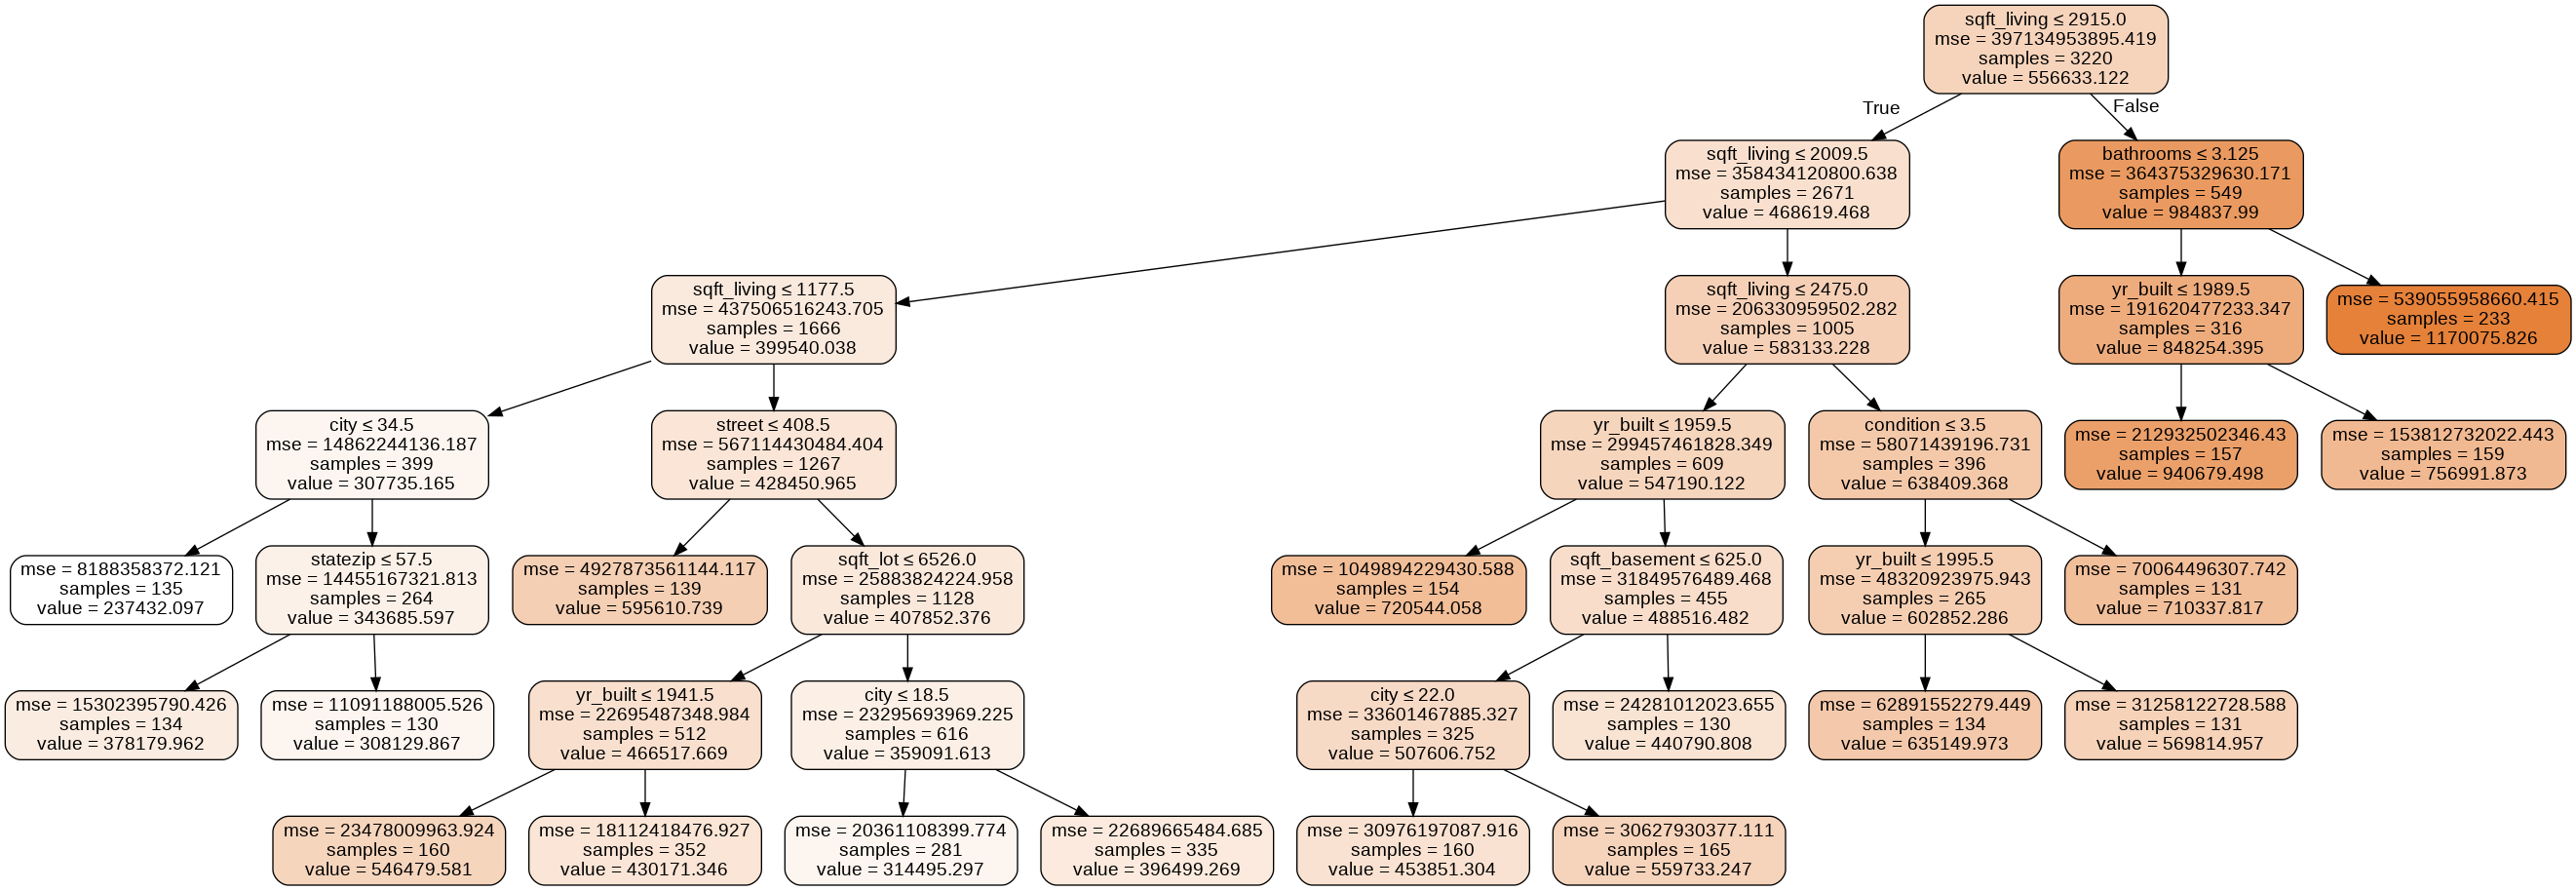

In [95]:
from IPython.display import Image
from sklearn.externals.six import StringIO 
Image(get_png_tree(grid.best_estimator_, train_x_df.columns), height="500")